In [ ]:
import numpy as np
from scipy.io import arff
import pandas as pd
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data = arff.loadarff('../datasets/Training Dataset.arff')
df = pd.DataFrame(data[0]).astype('int')
keys = ['URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
         'Domain_registeration_length', 'Abnormal_URL', 'age_of_domain', 'URL_of_Anchor', 'SFH',
         'Submitting_to_email', 'Result']
df = df[keys]
X, y = df.values[:, :-1], df.values[:, -1]
for i in range(len(y)):
    if y[i] == -1:
        y[i] = 1
    else:
        y[i] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5331)

xgb = XGBClassifier(objective='binary:logistic', colsample_tree=0.3, 
                    learning_rate=0.1, max_depth=6,
                    alpha=10, n_estimators=10)
xgb.fit(X_train, y_train)




[12:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              colsample_tree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)

In [ ]:
from collections import Counter
yy = list(y_test)
result = Counter(yy)
print(result)

Counter({0: 1230, 1: 981})


In [ ]:
# Do the cross validation
scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[18:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.


In [ ]:
predictions = cross_val_predict(xgb, X_test , y_test, cv=10)
acc_xgb = (predictions == y_test).sum().astype(float) / len(predictions)*100
print("XGBoost's prediction accuracy is: %3.2f " % (acc_xgb))

[18:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_tree" } might not be used.


,Importance
Feature,
URL_of_Anchor,0.792821
SFH,0.078943
Prefix_Suffix,0.054109
age_of_domain,0.027551
Shortining_Service,0.024911
Domain_registeration_length,0.012598
URL_Length,0.008592
having_At_Symbol,0.000468
double_slash_redirecting,0.000008


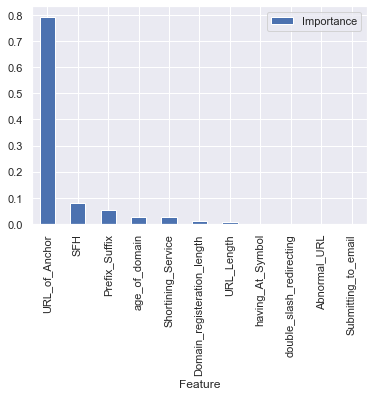

In [ ]:
importances = pd.DataFrame({
    'Feature': keys[:-1],
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances.plot.bar()
importances

The most important feature is *'URL_of_Anchor'*.

array([[1143,   87],
       [ 236,  745]], dtype=int64)

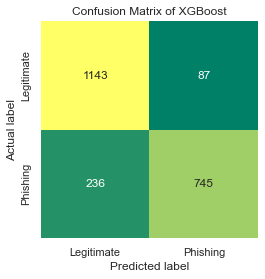

In [ ]:
import seaborn as sns
sns.set()

mat = confusion_matrix(y_test, predictions)
labels = ['Legitimate','Phishing']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='summer',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of XGBoost") 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
mat

The first row shows that out of 1230 legimate websites, 1143 were classified correctly as legal wesites. 87 websites were classified incorrectly as phishing websites.
The second row shows out of 981 websites 745 were classified correctly. 246 websitess were classified incorrectly as normal websites.
In total, We have 323 objects which were classified incorrectly. Most of the objects were recognized as what they are.

In [ ]:
print("Precision:", precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions))

Precision: 0.8954326923076923
Recall: 0.7594291539245668
F1-Score: 0.821842250413679


Precision is the fraction of events where the algorithm classified an object of type t correctly out of all occurences of the algorithm classifying objects of type t. Recall is the fraction of events where the algorithm classified an object of type t correctly when the true type of that object was actually t. One can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

Precision in our case:

For every class its calculated how many objects were classified as phishing websites or non-phishing websites in relation to the amount of correct phishing websites or non-phishing websites predictions. The results are averaged --> 89.54%.

Recall in our case:

For every class its calculated how many objects were classified as phishing websites or non-phishing websites in relation to the total amount of predictions where the object actually was a phishing website or non-phishing website. The results are averaged --> 75.94%.

F1-Score in our case:
--> 82.18% relatively high


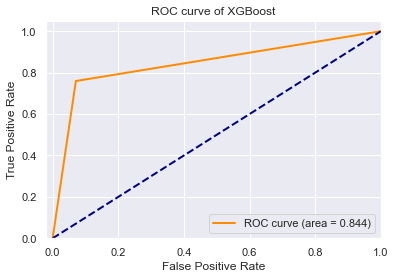

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of XGBoost')
plt.legend(loc="lower right")
plt.show()
##################################################